<a href="https://colab.research.google.com/github/ajbsarmi/Exercises/blob/main/Scipy_Introduction_to_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linkage matrix:
 [[ 5.          6.          0.          2.        ]
 [ 2.          7.          0.          2.        ]
 [ 0.          4.          1.          2.        ]
 [ 1.          8.          1.15470054  3.        ]
 [ 9.         10.          2.12132034  4.        ]
 [ 3.         12.          4.11096096  5.        ]
 [11.         13.         14.07183949  8.        ]]


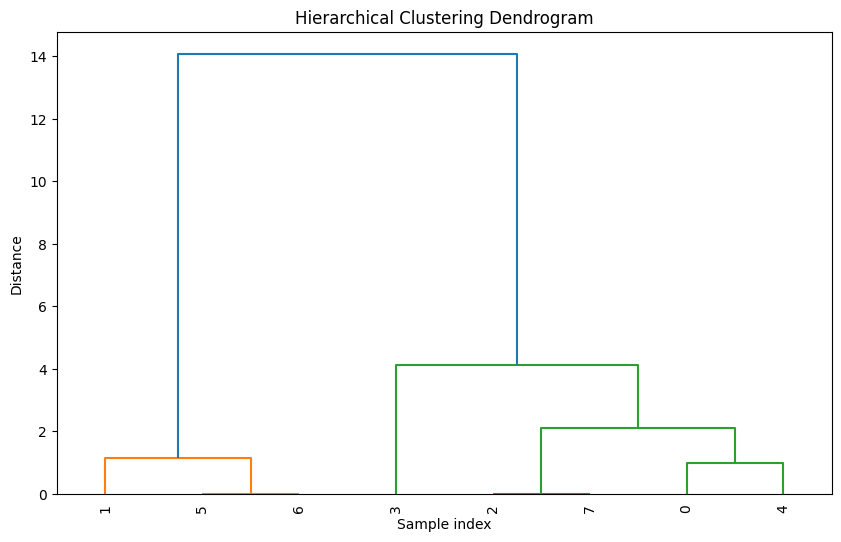

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
import numpy as np

# Example data: 8 one-dimensional points for simplicity
X = np.array([[2], [8], [0], [4], [1], [9], [9], [0]])

# Perform hierarchical clustering using 'ward' method (which minimizes variance)
Z = linkage(X, method='ward')

print("Linkage matrix:\n", Z)
# Each row: [idx1, idx2, distance, sample_count]

# Visualize the clustering with a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
print(X)

[[2]
 [8]
 [0]
 [4]
 [1]
 [9]
 [9]
 [0]]


Cluster labels with distance criterion: [2 1 2 3 2 1 1 2]
Cluster labels with maxclust criterion: [2 1 2 2 2 1 1 2]


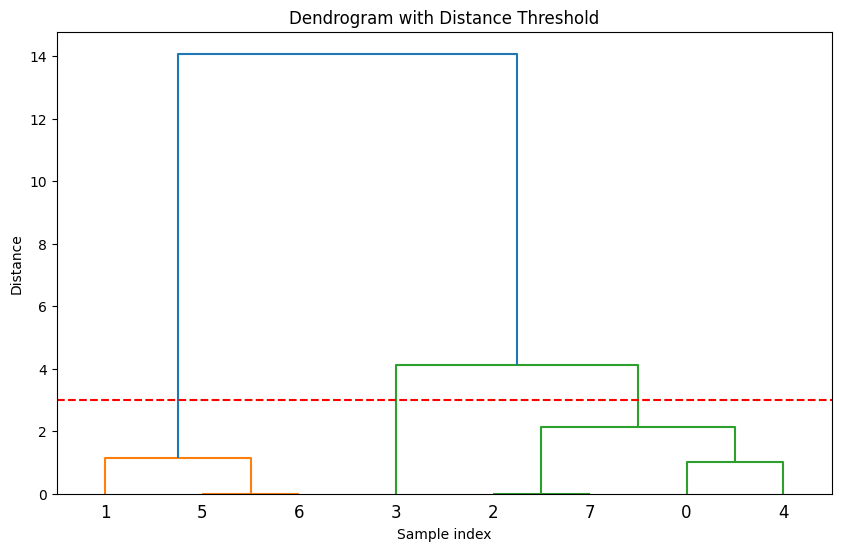

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib import pyplot as plt
import numpy as np

# Create sample data
X = np.array([[2], [8], [0], [4], [1], [9], [9], [0]])

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Form flat clusters using a distance threshold (for example, t=3)
clusters = fcluster(Z, t=3, criterion='distance')
print("Cluster labels with distance criterion:", clusters)

# Alternatively, specify the maximum number of clusters (for example, 2 clusters)
clusters_max = fcluster(Z, t=2, criterion='maxclust')
print("Cluster labels with maxclust criterion:", clusters_max)

# Optional: Plot the dendrogram with a horizontal line for the threshold
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=3, color='r', linestyle='--')
plt.title("Dendrogram with Distance Threshold")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Centroids:
 [[7.95227356 8.07003103]
 [1.93216218 1.9639913 ]]
Final Distortion: 0.5853110892811226


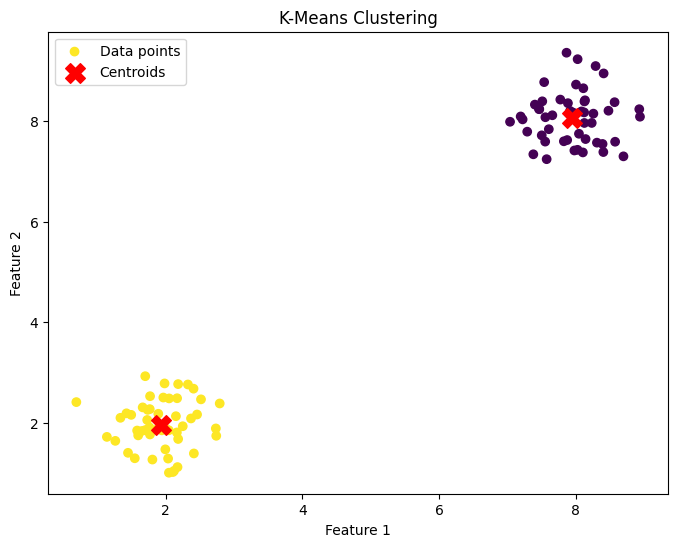

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
# Two clusters in 2D space
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2))
data = np.vstack((cluster1, cluster2))

# Perform k-means clustering to get 2 clusters
centroids, distortion = kmeans(data, 2, iter=20, thresh=1e-05)

print("Centroids:\n", centroids)
print("Final Distortion:", distortion)

# To assign each observation a cluster label, use vq() (vector quantization)
labels, _ = vq(data, centroids)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
print(data)

[[2.24835708 1.93086785]
 [2.32384427 2.76151493]
 [1.88292331 1.88293152]
 [2.78960641 2.38371736]
 [1.76526281 2.27128002]
 [1.76829115 1.76713512]
 [2.12098114 1.04335988]
 [1.13754108 1.71885624]
 [1.49358444 2.15712367]
 [1.54598796 1.29384815]
 [2.73282438 1.88711185]
 [2.0337641  1.28762591]
 [1.72780864 2.05546129]
 [1.42450321 2.18784901]
 [1.69968066 1.85415313]
 [1.69914669 2.92613909]
 [1.99325139 1.47114454]
 [2.41127246 1.38957818]
 [2.1044318  1.02016494]
 [1.33590698 2.09843062]
 [2.36923329 2.08568414]
 [1.94217586 1.84944815]
 [1.260739   1.6400779 ]
 [1.76968061 2.52856111]
 [2.17180914 1.11847992]
 [2.16204198 1.80745886]
 [1.661539   2.30583814]
 [2.51549976 2.46564006]
 [1.58039124 1.84539381]
 [2.16563172 2.48777256]
 [1.76041288 1.90717051]
 [1.44683251 1.40189669]
 [2.40626291 2.67812001]
 [1.96399494 2.50176645]
 [2.18081801 1.67744012]
 [2.1806978  2.76901828]
 [1.98208698 2.78232183]
 [0.69012745 2.41095125]
 [2.04352353 1.85049632]
 [2.04588039 1.00621554]


Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Distances to assigned centroids: [0.31792511 0.88851494 0.09484279 0.95466254 0.34968809 0.25613682
 0.93979509 0.83157314 0.47921869 0.77344836 0.80434471 0.68395401
 0.22389089 0.55482421 0.25712271 0.98996192 0.49661839 0.74799538
 0.9594191  0.61122353 0.45369626 0.11498002 0.74547232 0.58748561
 0.87881747 0.27811351 0.4360002  0.76937261 0.37122522 0.57345866
 0.18090446 0.74262726 0.85717637 0.53871647 0.37939596 0.84251908
 0.81985202 1.3200089  0.15900459 0.9645031  0.21863663 0.83707059
 0.3991742  0.56244552 0.35279633 0.53318671 0.31069988 0.70746432
 0.27266514 0.10752963 0.71703834 0.48711952 0.13603681 0.99096968
 0.20653388 0.9154558  1.1641953  0.09416565 0.65507444 0.69059988
 0.68687692 1.07496985 1.08046989 0.5701137  0.33623148 0.72848299
 0.51

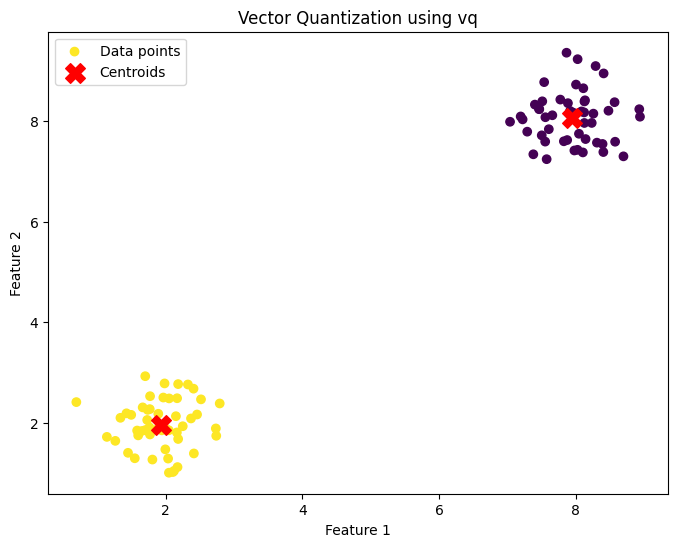

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# Create some sample data: two clusters in 2D space
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
cluster2 = np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2))
data = np.vstack((cluster1, cluster2))

# Compute centroids using kmeans
centroids, distortion = kmeans(data, 2)

# Assign each data point to the nearest centroid using vq
codes, distances = vq(data, centroids)

print("Cluster assignments:", codes)
print("Distances to assigned centroids:", distances)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=codes, cmap='viridis', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title("Vector Quantization using vq")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
import statistics

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

# Calculate mean and sample standard deviation
mean = statistics.mean(data)
std_dev = statistics.stdev(data)

# Calculate the z-score for each element in the list
z_scores = [(x - mean) / std_dev for x in data]

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Z-scores:", z_scores)


Mean: 3.1538461538461537
Standard Deviation: 1.908147174886057
Z-scores: [0.967511243604198, -1.1287631175382309, -0.08062593696701645, -0.08062593696701645, -0.6046945272526237, -0.08062593696701645, -0.08062593696701645, 2.53971701446102, -1.1287631175382309, -0.6046945272526237, -0.6046945272526237, -0.08062593696701645, 0.967511243604198]


In [ ]:
# x_new =  x / std_dev(x)
from scipy.cluster.vq import whiten
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

scaled_data = whiten(data)
print(scaled_data)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]
